In [1]:
import csv
f=open("irisself.txt",'r')
reader = csv.reader(f)
import numpy as np
import pandas as pd
import random
import random
df=pd.read_csv('irisself.txt')
df=df.drop(['SepalWidth','PetalLength'],axis=1)



In [2]:
df.head()
#print(df)

,SepalLength,PetalWidth,label
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa


In [3]:
for x in range(0,len(df)):
    if (df.iloc[x,-1])=="Iris-virginica":
        continue
    else:
        df.iloc[x,-1]="Not-virginica"
df.head()       

,SepalLength,PetalWidth,label
0,5.1,0.2,Not-virginica
1,4.9,0.2,Not-virginica
2,4.7,0.2,Not-virginica
3,4.6,0.2,Not-virginica
4,5.0,0.2,Not-virginica


In [4]:
import math
def total_error_n_AoS(pred,label,wt):
    TE=0
    new_wt=numpy.ones_like(wt)
    for i in range(0,len(pred)):
        if pred[i]!=label[i]:
            TE=TE+wt[i]
    amount_of_say=0.5*(math.log10((1-TE)/TE))
    
    for i in range(0,len(pred)):
        if pred[i]!=label[i]:
            new_wt[i]=wt[i]*(math.exp(amount_of_say))
            #print("wrong")
        else:
            new_wt[i]=wt[i]*(math.exp((-1)*amount_of_say))
    new_wt=new_wt/(numpy.sum(new_wt[:]))
    #print(new_wt)
            
    #print(new_wt)
    return amount_of_say,new_wt

In [5]:
def col_string(a):
    col_str=[]
    for x in a:
        if x=='Iris-virginica':
            col_str.append('red')
        else:
            col_str.append('blue')
    return col_str

In [6]:
#will need input df,wt2
#will need output clf2,AoS,df2
def fwd_algo(df,wt2):
    df2=create_new_dataset2(df,wt2)
    clf2 = clf.fit(df2[:,0:1],df2[:,-1] )
    pred2=clf.predict(df2[:,0:1])
    AoS2,wt3=total_error_n_AoS(pred2,df2[:,-1],wt2)
    return AoS2,wt3,df2,clf2


In [7]:
import random

import pandas as pd
def create_new_dataset(df,wt):
    #new_dataset=pd.DataFrame()
    new_dataset=numpy.empty(df.shape,dtype=object)
    cdf=numpy.cumsum(wt)
    #print(cdf)
    #randnums= np.random.randi
    #nt(1,101,len(wt))/100
    for i in range(0,len(cdf)):
        b=random.uniform(0.01,0.99)
        #print(b)
        for j in range(0,len(cdf)-1):
            if b>cdf[j] and b<=cdf[j+1]:
                #print(df.iloc[i,:])
                new_dataset[i]=df.iloc[j,:]
            
                #print(i)
    return new_dataset

In [8]:
def create_new_dataset2(df,wt):
    #new_dataset=pd.DataFrame()
    new_dataset=numpy.empty(df.shape,dtype=object)
    cdf=numpy.cumsum(wt)
    #print(cdf)
    #randnums= np.random.randint(1,101,len(wt))/100
    for i in range(0,len(cdf)):
        b=random.uniform(0.01,0.99)
        #print(b)
        for j in range(0,len(cdf)-1):
            if b>cdf[j] and b<=cdf[j+1]:
                #print(df.iloc[i,:])
                new_dataset[i]=df[j,:] #removed iloc
            
                #print(i)
    return new_dataset

In [9]:
import numpy
import matplotlib.pyplot as plt
training_df=df.iloc[:,0:2]
label_df=df.iloc[:,-1]
from sklearn import tree

X = training_df
Y = label_df
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth=1)
clf = clf.fit(X, Y)
pred1=clf.predict(X)
a=numpy.ones_like(pred1)
a=a/150
#print(a)
AoS,wt2=total_error_n_AoS(pred1,Y,a)
#col=col_string(df2[:,-1])
#print(col)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=None)
#print(wt2)


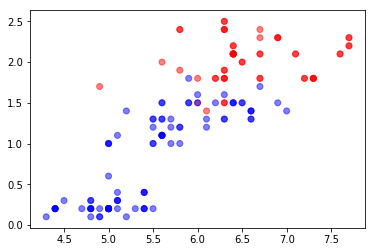

In [10]:

df2=create_new_dataset(df,wt2)
clf2 = clf.fit(df2[:,0:1],df2[:,-1] )
pred2=clf.predict(df2[:,0:1])
AoS2,wt3=total_error_n_AoS(pred2,df2[:,-1],wt2)
col=col_string(df2[:,-1])
plt.scatter(df2[:,0],df2[:,1] ,c=col, alpha=0.5)
#print(wt3)
##3rd stage


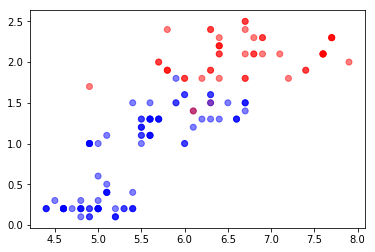

In [11]:
AoS2,wt3,df3,clf2=fwd_algo(df.values,wt2)
col=col_string(df3[:,-1])
plt.scatter(df3[:,0],df3[:,1] ,c=col, alpha=0.5)
#print(wt3)
#numpy.round(a)
#wt4.tolist()
#wt4=wt4**1000000000
#plt.scatter(df3[:,0],df3[:,1] ,c=None, alpha=0.5)
#print(clf2)
    

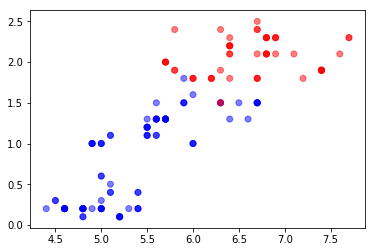

In [12]:
AoS3,wt4,df4,clf3=fwd_algo(df3,wt3)
col=col_string(df4[:,-1])
plt.scatter(df4[:,0],df4[:,1] ,c=col, alpha=0.5)
#print(wt3)
#numpy.round(a)

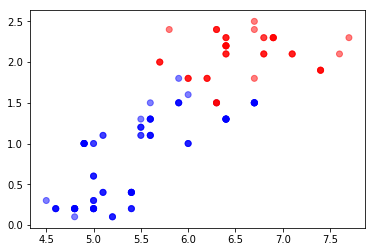

In [13]:
AoS4,wt5,df5,clf4=fwd_algo(df4,wt4)
col=col_string(df5[:,-1])
plt.scatter(df5[:,0],df5[:,1] ,c=col, alpha=0.5)
#print(wt3)

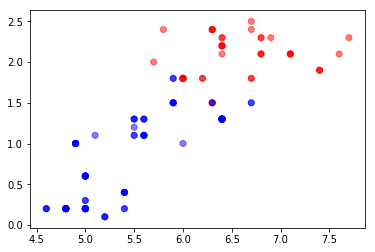

In [14]:
AoS5,wt6,df6,clf5=fwd_algo(df5,wt5)
col=col_string(df6[:,-1])
plt.scatter(df6[:,0],df6[:,1] ,c=col, alpha=0.5)
#print(wt3)

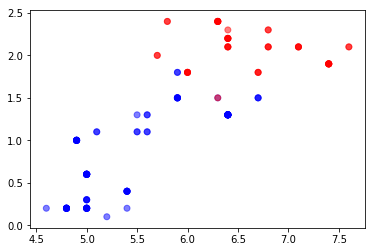

In [15]:
AoS6,wt7,df7,clf6=fwd_algo(df6,wt6)
col=col_string(df7[:,-1])
plt.scatter(df7[:,0],df7[:,1] ,c=col, alpha=0.5)
#print(wt3)

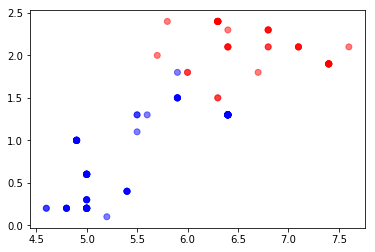

In [16]:
AoS7,wt8,df8,clf7=fwd_algo(df7,wt7)
col=col_string(df8[:,-1])
plt.scatter(df8[:,0],df8[:,1] ,c=col, alpha=0.5)
#print(wt3)

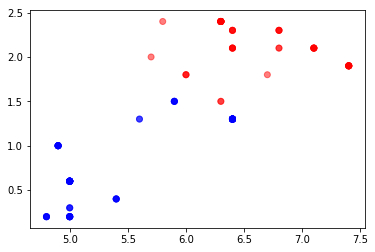

In [17]:
AoS8,wt9,df9,clf8=fwd_algo(df8,wt8)
#print(df9)
col=col_string(df9[:,-1])
plt.scatter(df9[:,0],df9[:,1] ,c=col, alpha=0.5)

#print(wt3)

In [18]:
'''import math
def total_error_n_AoS(pred,label,wt):
    TE=0
    new_wt=numpy.ones_like(wt)
    for i in range(0,len(pred)):
        if pred[i]!=label[i]:
            TE=TE+wt[i]
    amount_of_say=0.5*(math.log10((1-TE)/TE))
    
    for i in range(0,len(pred)):
        if pred[i]!=label[i]:
            new_wt[i]=wt[i]*(math.exp(amount_of_say))
            #print("wrong")
        else:
            new_wt[i]=wt[i]*(math.exp((-1)*amount_of_say))
    new_wt=new_wt/(numpy.sum(new_wt[:]))
    #print(new_wt)
            
    #print(new_wt)
    return amount_of_say,new_wt
    '''

'import math\ndef total_error_n_AoS(pred,label,wt):\n    TE=0\n    new_wt=numpy.ones_like(wt)\n    for i in range(0,len(pred)):\n        if pred[i]!=label[i]:\n            TE=TE+wt[i]\n    amount_of_say=0.5*(math.log10((1-TE)/TE))\n    \n    for i in range(0,len(pred)):\n        if pred[i]!=label[i]:\n            new_wt[i]=wt[i]*(math.exp(amount_of_say))\n            #print("wrong")\n        else:\n            new_wt[i]=wt[i]*(math.exp((-1)*amount_of_say))\n    new_wt=new_wt/(numpy.sum(new_wt[:]))\n    #print(new_wt)\n            \n    #print(new_wt)\n    return amount_of_say,new_wt\n    '

In [19]:
import random
b=random.uniform(0,1)
print(b)

0.5456590560297114
